In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
boston_311_data = pd.read_csv('/Users/johnmorales/Desktop/tmp5x4m4b_o.csv')

In [18]:
boston_311_data.describe()

,case_enquiry_id,location_zipcode,latitude,longitude
count,3.577400e+04,27313.000000,35774.00000,35774.000000
mean,1.010030e+11,2126.745433,42.33341,-71.077099
std,0.000000e+00,17.048493,0.03336,0.033273
min,1.010030e+11,2108.000000,42.23210,-71.181000
25%,1.010030e+11,2119.000000,42.30950,-71.090600
50%,1.010030e+11,2125.000000,42.34320,-71.065000
75%,1.010030e+11,2130.000000,42.35940,-71.058700
max,1.010030e+11,2467.000000,42.39330,-70.995100


In [19]:
boston_311_data.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,1.010030e+11,1/13/20 9:33,1/28/20 9:33,NaN,OVERDUE,Open,,PRINTED // Street Light Outages // GAS // ...,Public Works Department,Street Lights,...,A1,Beacon Hill,3,Ward 3,306,29 Myrtle St,2114.0,42.3594,-71.0657,Citizens Connect App
1,1.010030e+11,1/12/20 19:47,1/28/20 8:30,1/30/20 15:27,OVERDUE,Closed,Case Closed Case Resolved Replaced photocell ...,"""All Street Lights Out."" (Check Overhead) ///I...",Public Works Department,Street Lights,...,D4,Back Bay,14,Ward 5,509,290 Commonwealth Ave,2115.0,42.3496,-71.0848,Citizens Connect App
2,1.010030e+11,1/1/20 16:19,NaN,1/13/20 16:27,ONTIME,Closed,Case Closed. Closed date : 2020-01-13 16:27:37...,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,...,C11,Dorchester,7,Ward 16,1611,461 Gallivan Blvd,2124.0,42.2820,-71.0580,Constituent Call
3,1.010030e+11,1/3/20 14:00,NaN,NaN,ONTIME,Open,,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,...,D4,Boston,6,5,501,169-189 Columbus Ave,2116.0,42.3491,-71.0715,Citizens Connect App
4,1.010030e+11,1/4/20 16:41,NaN,NaN,ONTIME,Open,,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,...,D4,South End,6,4,404,INTERSECTION Claremont St & Wellington St,NaN,42.3594,-71.0587,Citizens Connect App


In [20]:
boston_311_data = boston_311_data.drop(["case_enquiry_id","closure_reason",
                                        "queue","fire_district","pwd_district","city_council_district",
                                        "police_district","ward","closedphoto","location","precinct"],axis=1)

In [21]:
boston_311_data.shape

(35774, 18)

In [22]:
boston_311_data.head()

,open_dt,target_dt,closed_dt,ontime,case_status,case_title,subject,reason,type,department,submittedphoto,neighborhood,neighborhood_services_district,location_street_name,location_zipcode,latitude,longitude,source
0,1/13/20 9:33,1/28/20 9:33,NaN,OVERDUE,Open,PRINTED // Street Light Outages // GAS // ...,Public Works Department,Street Lights,Street Light Outages,PWDx,NaN,Beacon Hill,3,29 Myrtle St,2114.0,42.3594,-71.0657,Citizens Connect App
1,1/12/20 19:47,1/28/20 8:30,1/30/20 15:27,OVERDUE,Closed,"""All Street Lights Out."" (Check Overhead) ///I...",Public Works Department,Street Lights,Street Light Outages,PWDx,NaN,Back Bay,14,290 Commonwealth Ave,2115.0,42.3496,-71.0848,Citizens Connect App
2,1/1/20 16:19,NaN,1/13/20 16:27,ONTIME,Closed,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,BTDT,NaN,Dorchester,7,461 Gallivan Blvd,2124.0,42.2820,-71.0580,Constituent Call
3,1/3/20 14:00,NaN,NaN,ONTIME,Open,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,BTDT,NaN,Boston,6,169-189 Columbus Ave,2116.0,42.3491,-71.0715,Citizens Connect App
4,1/4/20 16:41,NaN,NaN,ONTIME,Open,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,BTDT,https://311.boston.gov/media/boston/report/pho...,South End,6,INTERSECTION Claremont St & Wellington St,NaN,42.3594,-71.0587,Citizens Connect App


In [23]:
boston_311_data.isnull().sum()

open_dt                               0
target_dt                          4347
closed_dt                          7685
ontime                                0
case_status                           0
case_title                            0
subject                               0
reason                                0
type                                  0
department                            0
submittedphoto                    19507
neighborhood                         37
neighborhood_services_district        1
location_street_name                389
location_zipcode                   8461
latitude                              0
longitude                             0
source                                0
dtype: int64

In [24]:
boston_311_data['text length'] = boston_311_data['case_title'].apply(len)

In [25]:
grid = sns.FacetGrid(yelp_reviews,col='stars')
grid.map(plt.hist,'text length')

NameError: name 'yelp_reviews' is not defined

In [26]:
boston_311_data['source'].unique()

array(['Citizens Connect App', 'Constituent Call', 'Employee Generated',
       'City Worker App', 'Self Service'], dtype=object)

In [27]:
boston_311_data['department'].value_counts()

PWDx    18925
BTDT     8745
ISD      2767
INFO     1536
PARK     1443
GEN_     1228
BWSC      539
PROP      401
ANML       90
BPD_       35
BPS_       21
BHA_       17
ONS_       14
DISB        8
DND_        5
Name: department, dtype: int64

In [28]:
boston_311_data['reason'].value_counts()

Enforcement & Abandoned Vehicles     6602
Highway Maintenance                  4818
Street Cleaning                      3902
Code Enforcement                     3395
Sanitation                           3181
Recycling                            3143
Signs & Signals                      1977
Street Lights                        1448
Needle Program                       1223
Building                             1199
Trees                                1078
Housing                              1034
Park Maintenance & Safety             435
Graffiti                              389
Animal Issues                         371
Employee & General Comments           333
Environmental Services                326
Administrative & General Requests     250
Abandoned Bicycle                     139
Health                                114
Notification                          101
Traffic Management & Engineering      100
Catchbasin                             65
Operations                        

In [29]:
new_reason = boston_311_data['reason'].value_counts().sort_values(ascending=False)

In [30]:
print(new_reason[1:12])

Highway Maintenance    4818
Street Cleaning        3902
Code Enforcement       3395
Sanitation             3181
Recycling              3143
Signs & Signals        1977
Street Lights          1448
Needle Program         1223
Building               1199
Trees                  1078
Housing                1034
Name: reason, dtype: int64


In [498]:
new 

SyntaxError: invalid syntax (<ipython-input-498-fd8f010bcf42>, line 1)

In [31]:
boston_311_data['case_status'].value_counts()

Closed    28089
Open       7685
Name: case_status, dtype: int64

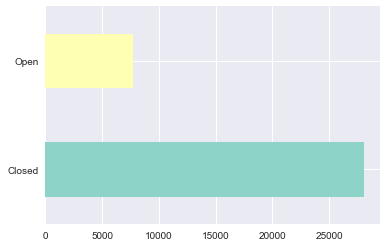

In [32]:
boston_311_data['case_status'].value_counts().plot(kind='barh')

In [33]:
boston_311_data['ontime'].value_counts()

ONTIME     31009
OVERDUE     4765
Name: ontime, dtype: int64

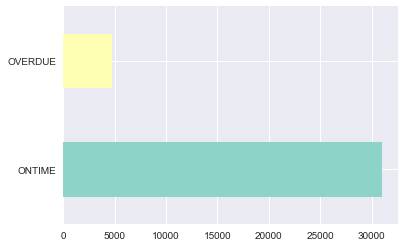

In [34]:
boston_311_data['ontime'].value_counts().plot(kind='barh')

In [35]:
boston_311_data['neighborhood_services_district'].value_counts()

13    3635
14    3324
10    3134
5     3011
15    2726
7     2673
1     2667
6     2542
8     2200
3     2068
11    2011
9     1796
2     1336
12    1153
4     1066
       389
0       42
Name: neighborhood_services_district, dtype: int64

In [36]:
boston_311_data['reason'].value_counts()

Enforcement & Abandoned Vehicles     6602
Highway Maintenance                  4818
Street Cleaning                      3902
Code Enforcement                     3395
Sanitation                           3181
Recycling                            3143
Signs & Signals                      1977
Street Lights                        1448
Needle Program                       1223
Building                             1199
Trees                                1078
Housing                              1034
Park Maintenance & Safety             435
Graffiti                              389
Animal Issues                         371
Employee & General Comments           333
Environmental Services                326
Administrative & General Requests     250
Abandoned Bicycle                     139
Health                                114
Notification                          101
Traffic Management & Engineering      100
Catchbasin                             65
Operations                        

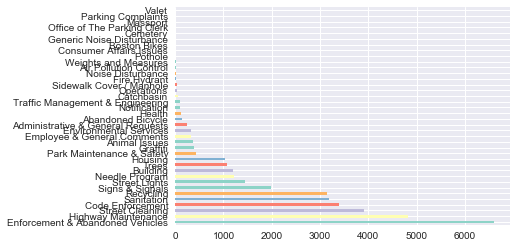

In [37]:
boston_311_data['reason'].value_counts().plot(kind='barh')

In [38]:
boston_311_data['source'].value_counts()

Citizens Connect App    15422
Constituent Call        11621
City Worker App          6404
Employee Generated       1438
Self Service              889
Name: source, dtype: int64

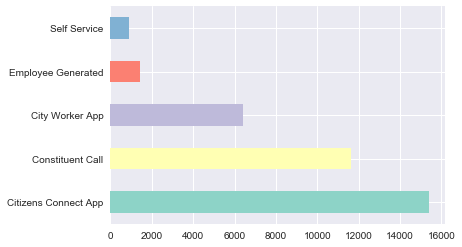

In [39]:
boston_311_data['source'].value_counts().plot(kind='barh')
plt.savefig('/Users/johnmorales/Desktop.eps', format='eps')

In [40]:
boston_311_data['source'].value_counts().sort_values(ascending=False)

Citizens Connect App    15422
Constituent Call        11621
City Worker App          6404
Employee Generated       1438
Self Service              889
Name: source, dtype: int64

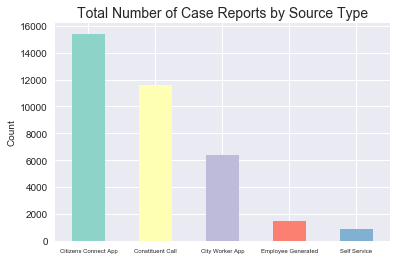

In [41]:
boston_311_data['source'].value_counts().plot(kind='bar')
sns.set(style="darkgrid",palette="Paired")
plt.title('Total Number of Case Reports by Source Type', size=14)
plt.ylabel('Count', size=10)
plt.xticks(rotation='horizontal',size=6)
plt.savefig('/Users/johnmorales/Desktop5.eps', format='eps')

In [42]:
boston_311_data['neighborhood'].value_counts()

Dorchester                                      5848
Roxbury                                         3267
East Boston                                     2668
Allston / Brighton                              2605
South Boston / South Boston Waterfront          2543
South End                                       2137
Jamaica Plain                                   2067
Downtown / Financial District                   1987
Hyde Park                                       1799
Back Bay                                        1707
Greater Mattapan                                1397
Charlestown                                     1336
West Roxbury                                    1244
Roslindale                                      1157
Boston                                           991
Beacon Hill                                      827
Fenway / Kenmore / Audubon Circle / Longwood     688
Mission Hill                                     588
                                              

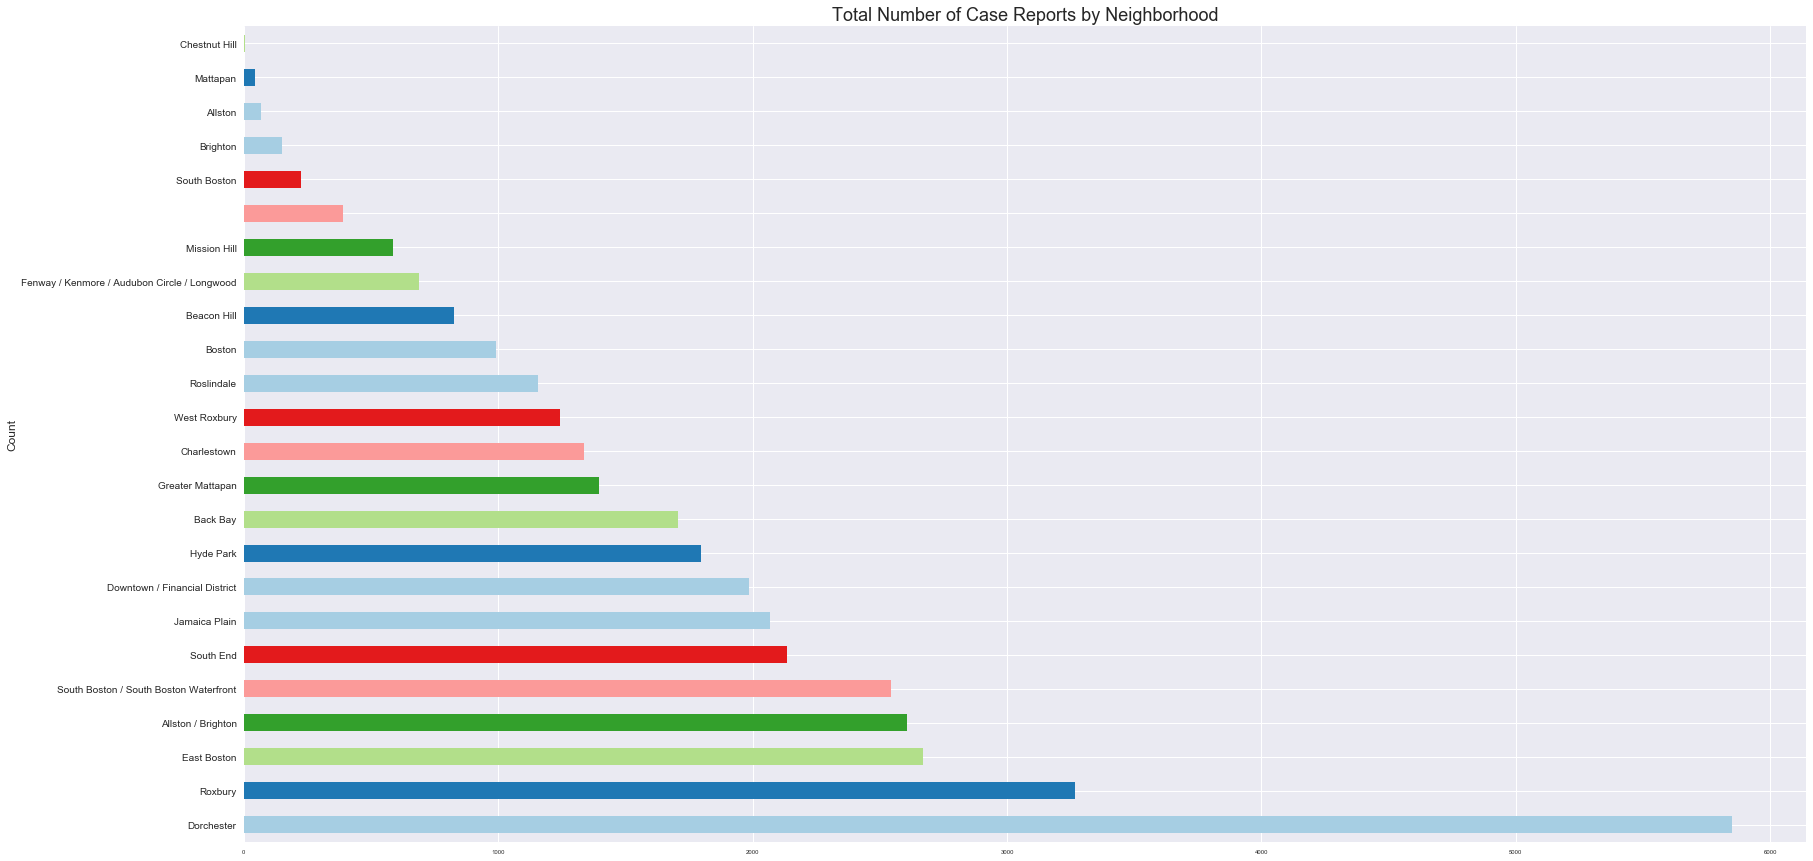

In [11]:
boston_311_data['neighborhood'].value_counts().plot(kind='barh',figsize=(28, 15))
sns.set(style="darkgrid",palette="Set2")
plt.title('Total Number of Case Reports by Neighborhood', size=18)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal',size=6)
plt.savefig('/Users/johnmorales/Desktop10.eps', format='eps')

In [43]:
df_neighborhood = pd.DataFrame(boston_311_data, columns = [neighborhood', 'Age']) 

SyntaxError: invalid syntax (<ipython-input-43-dd7c7fa37507>, line 1)

In [44]:
boston_311_data.shape

(35774, 19)

In [45]:
boston_311_data.head()

,open_dt,target_dt,closed_dt,ontime,case_status,case_title,subject,reason,type,department,submittedphoto,neighborhood,neighborhood_services_district,location_street_name,location_zipcode,latitude,longitude,source,text length
0,1/13/20 9:33,1/28/20 9:33,NaN,OVERDUE,Open,PRINTED // Street Light Outages // GAS // ...,Public Works Department,Street Lights,Street Light Outages,PWDx,NaN,Beacon Hill,3,29 Myrtle St,2114.0,42.3594,-71.0657,Citizens Connect App,51
1,1/12/20 19:47,1/28/20 8:30,1/30/20 15:27,OVERDUE,Closed,"""All Street Lights Out."" (Check Overhead) ///I...",Public Works Department,Street Lights,Street Light Outages,PWDx,NaN,Back Bay,14,290 Commonwealth Ave,2115.0,42.3496,-71.0848,Citizens Connect App,68
2,1/1/20 16:19,NaN,1/13/20 16:27,ONTIME,Closed,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,BTDT,NaN,Dorchester,7,461 Gallivan Blvd,2124.0,42.2820,-71.0580,Constituent Call,17
3,1/3/20 14:00,NaN,NaN,ONTIME,Open,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,BTDT,NaN,Boston,6,169-189 Columbus Ave,2116.0,42.3491,-71.0715,Citizens Connect App,17
4,1/4/20 16:41,NaN,NaN,ONTIME,Open,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,BTDT,https://311.boston.gov/media/boston/report/pho...,South End,6,INTERSECTION Claremont St & Wellington St,NaN,42.3594,-71.0587,Citizens Connect App,17


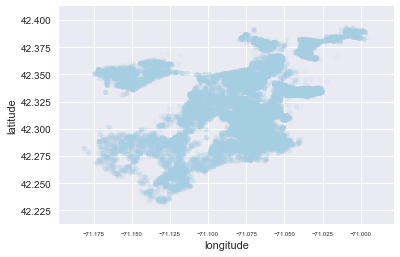

In [46]:
boston_311_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
sns.set(style="darkgrid",palette="Set3")
plt.xticks(rotation='horizontal',size=6)
plt.savefig('/Users/johnmorales/mapping1.pdf', format='pdf')

In [47]:
percentage_dataset = boston_311_data.drop(["open_dt","target_dt","closed_dt","submittedphoto",
                                           "neighborhood_services_district","location_street_name","case_title",
                                           "location_zipcode","latitude","longitude","source","text length",
                                           "subject","reason","type","department"],axis=1)

In [48]:
percentage_dataset.head()

,ontime,case_status,neighborhood
0,OVERDUE,Open,Beacon Hill
1,OVERDUE,Closed,Back Bay
2,ONTIME,Closed,Dorchester
3,ONTIME,Open,Boston
4,ONTIME,Open,South End


In [54]:
percentage_dataset['case_status'].value_counts()/case_by_neighborhood1.sum()

Closed    0.785992
Open      0.215043
Name: case_status, dtype: float64

In [55]:
percentages = percentage_dataset['case_status'].value_counts()/case_by_neighborhood1.sum()
labels = ['Closed/Total', 'Open/Total']
explode=(0.1,0)

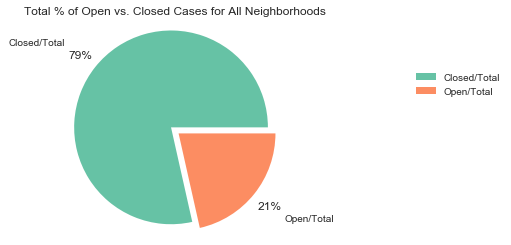

In [56]:
fig, ax = plt.subplots()
ax.pie(percentages, explode=explode, labels=labels,  
       colors=sns.color_palette("Set2"), autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Total % of Open vs. Closed Cases for All Neighborhoods")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.savefig('/Users/johnmorales/pieforopenclosed.eps', format='eps')

In [57]:
percentage_dataset['ontime'].value_counts()/case_by_neighborhood1.sum()

ONTIME     0.867700
OVERDUE    0.133335
Name: ontime, dtype: float64

In [58]:
percentages = percentage_dataset['ontime'].value_counts()/case_by_neighborhood1.sum()
labels = ['Ontime/Total', 'Overdue/Total']
explode=(0.1,0)

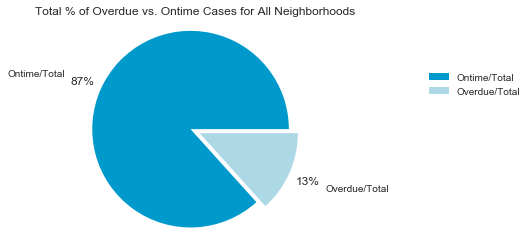

In [59]:
fig, ax = plt.subplots()
color_palette_list = ['#0099CC', '#ADD8E6']
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Total % of Overdue vs. Ontime Cases for All Neighborhoods")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.savefig('/Users/johnmorales/piechart.eps', format='eps')

In [60]:
case_by_neighborhood1 = percentage_dataset.groupby(["neighborhood","case_status"])["ontime"].count()

In [74]:
df['percentage'] = case_by_neighborhood1['case_status'=="Open"]/case_by_neighborhood1['case_status'].sum()

KeyError: 'case_status'

In [63]:
case_by_neighborhood1.sum()

35737

In [75]:
percentage_dataset.loc[percentage_dataset['ontime'] == 'ONTIME'].count()

ontime          31009
case_status     31009
neighborhood    30982
dtype: int64

In [65]:
boston_311_data['case_status'].query('case_status == "Closed"').sum()

AttributeError: 'Series' object has no attribute 'query'

In [66]:
case_by_neighborhood1.head

<bound method NDFrame.head of neighborhood                                  case_status
                                              Closed          244
                                              Open            145
Allston                                       Closed           52
                                              Open             15
Allston / Brighton                            Closed         2083
                                              Open            522
Back Bay                                      Closed         1360
                                              Open            347
Beacon Hill                                   Closed          665
                                              Open            162
Boston                                        Closed          748
                                              Open            243
Brighton                                      Closed          119
                                              Open    

In [76]:
boston_311_data['case_status'].query('case_status == "Closed"').sum()

AttributeError: 'Series' object has no attribute 'query'

In [67]:
case_by_neighborhood1 = boston_311_data.groupby(["neighborhood","case_status"])["ontime"].count()

In [68]:
case_by_neighborhood2 = boston_311_data.groupby(["neighborhood","case_status"]).count()

In [69]:
case_by_neighborhood3 = boston_311_data.groupby(["neighborhood","ontime"]).count()

In [70]:
case_by_neighborhood1.head(50)

neighborhood                                  case_status
                                              Closed          244
                                              Open            145
Allston                                       Closed           52
                                              Open             15
Allston / Brighton                            Closed         2083
                                              Open            522
Back Bay                                      Closed         1360
                                              Open            347
Beacon Hill                                   Closed          665
                                              Open            162
Boston                                        Closed          748
                                              Open            243
Brighton                                      Closed          119
                                              Open             31
Charlestown       

In [71]:
len(df[df['borough'] == 'MANHATTAN']) / len(boston_311_data[])

SyntaxError: invalid syntax (<ipython-input-71-7f6e6244a2f5>, line 1)

In [77]:
boston_311_data.isnull().any()

open_dt                           False
target_dt                          True
closed_dt                          True
ontime                            False
case_status                       False
case_title                        False
subject                           False
reason                            False
type                              False
department                        False
submittedphoto                     True
neighborhood                       True
neighborhood_services_district     True
location_street_name               True
location_zipcode                   True
latitude                          False
longitude                         False
source                            False
text length                       False
dtype: bool

In [78]:
tokenized_titles = []
for item in boston_311_data["case_title"]:
    tokenized_titles.append(item.split())

In [79]:
print(tokenized_titles[1:10])

[['"All', 'Street', 'Lights', 'Out."', '(Check', 'Overhead)', '///Issued', 'to', 'Maverick', '-', 'EP'], ['Abandoned', 'Bicycle'], ['Abandoned', 'Bicycle'], ['Abandoned', 'Bicycle'], ['Abandoned', 'Bicycle'], ['Abandoned', 'Bicycle'], ['Abandoned', 'Bicycle'], ['Abandoned', 'Bicycle'], ['Abandoned', 'Bicycle']]


In [80]:
punctuation = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]
new_tokenized = []
for item in tokenized_titles:
    tokens = []
    for token in item:
        token = token.lower()
        for punc in punctuation:
            token = token.replace(punc, "")
        tokens.append(token)
    new_tokenized.append(tokens)

In [85]:
print(new_tokenized[1:10])

[['all', 'street', 'lights', 'out', 'check', 'overhead', 'issued', 'to', 'maverick', '', 'ep'], ['abandoned', 'bicycle'], ['abandoned', 'bicycle'], ['abandoned', 'bicycle'], ['abandoned', 'bicycle'], ['abandoned', 'bicycle'], ['abandoned', 'bicycle'], ['abandoned', 'bicycle'], ['abandoned', 'bicycle']]


In [86]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [87]:
new_tokenized = [w for w in new_tokenized if not w in stop_words]

In [88]:
unique_tokens = []
single_tokens = []
for tokens in new_tokenized:
    for token in tokens:
        if token not in single_tokens:
            single_tokens.append(token)
        elif token in single_tokens and token not in unique_tokens:
            unique_tokens.append(token)

counts = pd.DataFrame(0, index=np.arange(len(new_tokenized)), columns=unique_tokens)

In [89]:
for i, item in enumerate(new_tokenized):
    for token in item:
        if token in unique_tokens:
            counts.iloc[i][token] += 1

In [90]:
word_counts = counts.sum(axis=0)

In [91]:
word_counts.head(20)

                2097
street          2873
abandoned       1024
bicycle          136
bike               6
building         132
vehicles         878
aircraft           2
noise             67
disturbance        9
animal           883
found             52
generic          277
request         6283
lost              38
disturbances      22
automotive         4
bed               21
bugs              21
big                5
dtype: int64

In [92]:
top_words = word_counts.sort_values(ascending=False)

In [93]:
print(top_words[1:20])

request        6283
parking        5826
enforcement    5723
repair         5389
pothole        3556
recycling      3449
requests       3381
pickup         3039
cart           3002
street         2873
trash          2382
of             2348
cleaning       2292
               2097
item           1875
bulk           1818
schedule       1764
sidewalk       1557
improper       1544
dtype: int64


In [94]:
grid = sns.FacetGrid(yelp_reviews,col='stars')
grid.map(plt.hist,'text length')

NameError: name 'yelp_reviews' is not defined

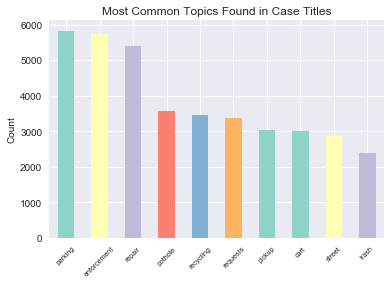

In [95]:
top_words[2:12].plot(kind='bar')
sns.set(style="darkgrid",palette="pastel")
plt.title('Most Common Topics Found in Case Titles', size=12)
plt.ylabel('Count', size=10)
plt.xticks(rotation=45,size=7)
plt.savefig('/Users/johnmorales/newone1.eps', format='eps')

In [96]:
filtered_top_words = top_words[2:12]

In [97]:
print(filtered_top_words)

parking        5826
enforcement    5723
repair         5389
pothole        3556
recycling      3449
requests       3381
pickup         3039
cart           3002
street         2873
trash          2382
dtype: int64


/Users/johnmorales/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


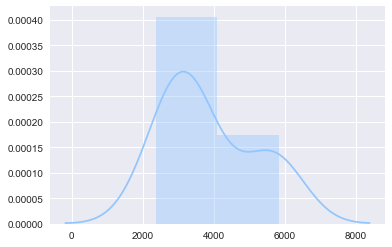

In [98]:
sns.distplot(filtered_top_words)

In [114]:
sns.countplot(x='topwords[2:30]',data=top_words,palette='muted')

ValueError: Could not interpret input 'topwords[2:30]'

ValueError: could not convert string to float: '2/18/20 6:46'

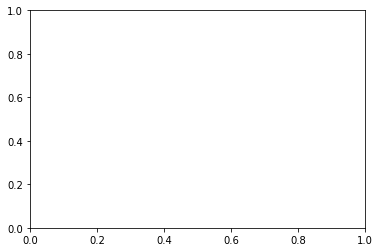

In [34]:
plt.scatter(boston_311_data['submittedphoto'], boston_311_data['closed_dt'], marker='o', color='orange')
plt.xlabel('Beer Servings')
plt.ylabel('Total Litres of Pure Alcohol')
plt.legend(loc='upper right')
plt.show()

In [36]:
boston_311_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35774 entries, 0 to 35773
Data columns (total 29 columns):
case_enquiry_id                   35774 non-null float64
open_dt                           35774 non-null object
target_dt                         31427 non-null object
closed_dt                         28089 non-null object
ontime                            35774 non-null object
case_status                       35774 non-null object
closure_reason                    35774 non-null object
case_title                        35774 non-null object
subject                           35774 non-null object
reason                            35774 non-null object
type                              35774 non-null object
queue                             35774 non-null object
department                        35774 non-null object
submittedphoto                    16267 non-null object
closedphoto                       8225 non-null object
location                          35774 non-null ob

In [ ]:
over_5 = rwd.loc[(rwd['quality'] > 5)]
less_5 = rwd.loc[(rwd['quality'] < 5)]
equal_5 = rwd.loc[(rwd['quality'] == 5)]

In [347]:
case_resolutions = counts.sum(boston_311_data['case_status'])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [346]:
pd.Series(np.where(boston_311_data['ontime'].values == 'Closed', 1, 0),sample.index

SyntaxError: unexpected EOF while parsing (<ipython-input-346-82053fe9815b>, line 1)

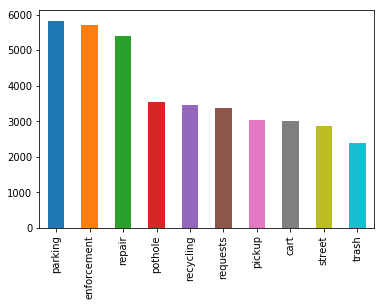

In [61]:
filtered_top_words.plot.bar()


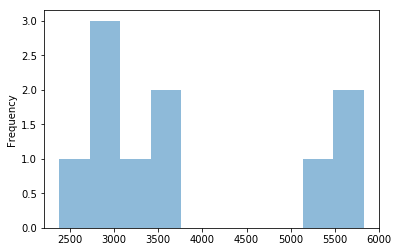

In [62]:
filtered_top_words.plot.hist(alpha=0.5)

In [ ]:
plt.hist(rwd.pH.values,bins=[2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5],edgecolor = 'orange')
plt.xlabel('pH', fontsize = 18)
plt.ylabel('# of occurrences', fontsize = 18)
plt.show()

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Genre", data=new_vgs)
plt.xticks(rotation=-45)

In [ ]:
genre_groups = new_vgs.pivot_table(index='Year', columns='Genre', values='Global_Sales', aggfunc='mean').plot()
plt.ylabel('Global Sales');

In [ ]:
group_data = boston_311_data.groupby("neighborhood")
group_data['beer_servings'].mean()

In [ ]:
df_heatmap = boston_311_data.pivot_table(index='neighborhood', columns='beer_servings', values='total_litres_of_pure_alcohol', aggfunc=np.mean)
sns.heatmap(df_heatmap, annot=True, fmt=".1f")
plt.show()